# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import json
from timeit import default_timer as timer
import json
import time
import math
import re
import requests
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_app = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_app.sample(25)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
103891,1.788276e+13,5773252,F,2016-06-06T07:01:57Z,2016-06-08T00:00:00Z,64,SANTA TEREZA,0,0,0,0,0,0,No
63252,1.786954e+12,5751670,F,2016-05-31T10:28:00Z,2016-05-31T00:00:00Z,60,JARDIM CAMBURI,0,0,0,0,0,0,No
80085,3.631887e+13,5634094,F,2016-04-28T10:21:43Z,2016-05-16T00:00:00Z,55,CENTRO,0,1,0,0,0,0,No
35908,8.112625e+13,5646228,F,2016-05-02T11:07:10Z,2016-05-02T00:00:00Z,60,SÃO CRISTÓVÃO,0,1,0,0,0,0,No
34193,2.777575e+14,5679372,F,2016-05-10T09:50:45Z,2016-05-30T00:00:00Z,19,RESISTÊNCIA,0,0,0,0,0,0,Yes
93800,6.223782e+13,5614833,M,2016-04-25T11:03:58Z,2016-06-01T00:00:00Z,49,SÃO CRISTÓVÃO,0,0,0,1,0,1,No
83566,7.829294e+13,5599986,F,2016-04-19T09:46:13Z,2016-05-16T00:00:00Z,41,DE LOURDES,0,0,0,0,0,0,No
16498,4.773269e+13,5558387,F,2016-04-07T16:30:43Z,2016-05-02T00:00:00Z,17,MARIA ORTIZ,0,0,0,0,0,1,No
59317,3.342658e+14,5654257,F,2016-05-03T14:06:27Z,2016-05-04T00:00:00Z,13,DA PENHA,1,0,0,0,0,0,Yes
69013,1.119328e+13,5593316,F,2016-04-18T09:08:01Z,2016-05-12T00:00:00Z,11,CARATOÍRA,0,0,0,0,0,0,Yes


In [3]:
#   checking the dataset.
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#   checking the some records with No show.
df_app[df_app["No-show"]=="Yes"].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


In [5]:
#generate descriptive statistics (for numeric columns only)
df_app.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#Check Data Completeness
pd.isna(df_app).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

In [7]:
#take a copy from the original df
df_app_backup=df_app.copy()
df_app_backup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
#remove duplication
df_app.drop_duplicates(inplace=True)
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [9]:
#check age
df_app[df_app["Age"] <= 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [10]:
#replace incorrect age (<= 0) with the AVG
df_app[df_app['Age'] <= 0] = df_app['Age'].mean()
df_app[df_app["Age"] <= 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [11]:
#Change ScheduledDay and AppointmentDay datatype to datetime
df_app.ScheduledDay = pd.to_datetime(df_app.ScheduledDay)
df_app.AppointmentDay = pd.to_datetime(df_app.AppointmentDay)
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  float64            
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  float64            
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  float64            
 8   Hipertension    110527 non-null  float64            
 9   Diabetes        110527 non-null  float64            
 10  Alcoholism      110527 non-null  float64            
 11  Handcap         110527 non-null  float64            
 12  SMS_received    110527 non-null  float64            
 13  No-show       

In [12]:
df_app.rename(columns = {'Hipertension': 'Hypertension','Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

In [13]:
# define a function to return the unique values

In [14]:
def uniqVal(columne_Name):
    unval=set()
    for appo in df_app[columne_Name]:
        unval.add(appo)
    return unval

In [15]:
print(uniqVal('No_show'))

{'Yes', 37.08887421173107, 'No'}


In [17]:
df_app.No_show.unique()

array(['No', 'Yes', 37.08887421173107], dtype=object)

In [18]:
#Transforming no show data from categorical to numeric
df_app.No_show[df_app['No_show'] == 'Yes'] = '1'
df_app.No_show[df_app['No_show'] == 'No'] = '0'
df_app['No_show'] = pd.to_numeric(df_app['No_show'])

In [19]:
df_app["No_show"].describe()

count    110527.000000
mean          1.384047
std           6.506818
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          37.088874
Name: No_show, dtype: float64

In [20]:
#Change No_show integer
df_app.No_show = df_app.No_show.astype(np.int64)

In [21]:
df_app

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903.0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0
1,5.589978e+14,5642503.0,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4.262962e+12,5642549.0,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0
3,8.679512e+11,5642828.0,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0
4,8.841186e+12,5642494.0,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768.0,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,0
110523,3.596266e+12,5650093.0,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,0
110524,1.557663e+13,5630692.0,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,0
110525,9.213493e+13,5630323.0,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

# Question 1 (what's the most sufficient parameter that affects show not-show output)

In [22]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'AppointmentID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hypertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handicap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>],
       [<AxesSubplot:title={'center':'No_show'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

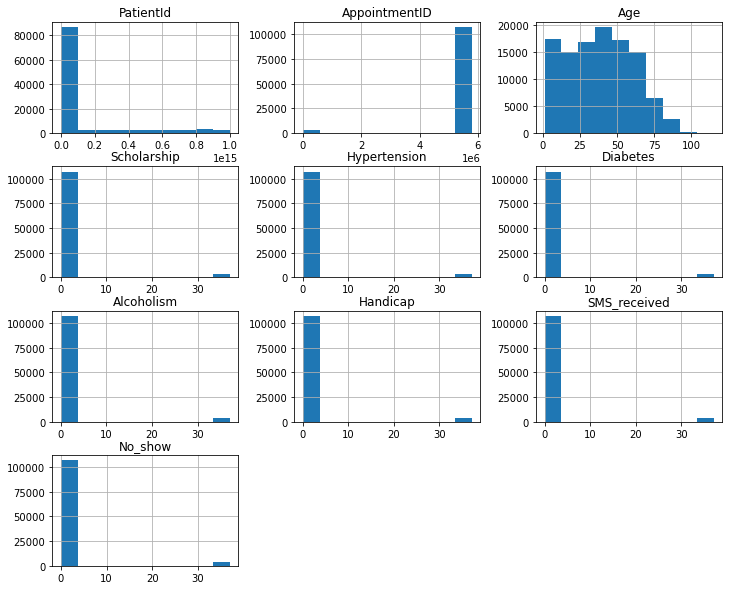

In [23]:
#visulize the data
df_app.hist(figsize=(12,10))

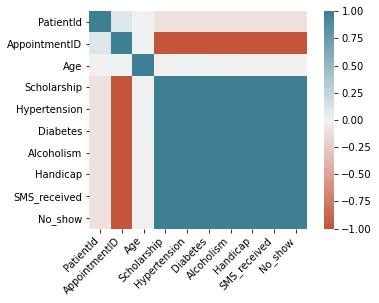

In [30]:
corr = df_app.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<AxesSubplot:>

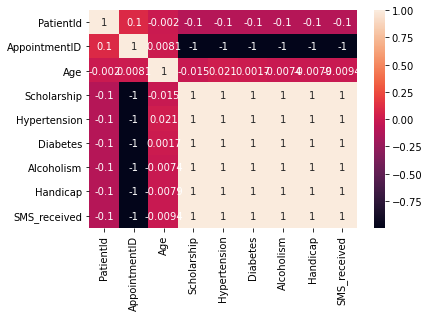

In [21]:
 dff = pd.DataFrame(df_app) 
  
corr = dff.corr() 
sns.heatmap(corr, annot = True)

In [17]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  float64            
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  float64            
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  float64            
 8   Hypertension    110527 non-null  float64            
 9   Diabetes        110527 non-null  float64            
 10  Alcoholism      110527 non-null  float64            
 11  Handicap        110527 non-null  float64            
 12  SMS_received    110527 non-null  float64            
 13  No_show       

In [31]:
corr

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
PatientId,1.000000,0.102529,-0.001953,-0.102481,-0.102672,-0.102335,-0.102157,-0.102654,-0.102829,-0.102365
AppointmentID,0.102529,1.000000,0.008112,-0.996439,-0.995639,-0.996700,-0.997137,-0.997214,-0.996297,-0.996379
Age,-0.001953,0.008112,1.000000,-0.014891,0.020822,0.001725,-0.007396,-0.007941,-0.009379,-0.013841
Scholarship,-0.102481,-0.996439,-0.014891,1.000000,0.997043,0.998134,0.998660,0.998649,0.996451,0.997191
Hypertension,-0.102672,-0.995639,0.020822,0.997043,1.000000,0.998400,0.997935,0.997956,0.995593,0.996151
Diabetes,-0.102335,-0.996700,0.001725,0.998134,0.998400,1.000000,0.998890,0.998967,0.996657,0.997323
Alcoholism,-0.102157,-0.997137,-0.007396,0.998660,0.997935,0.998890,1.000000,0.999351,0.997087,0.997797
Handicap,-0.102654,-0.997214,-0.007941,0.998649,0.997956,0.998967,0.999351,1.000000,0.997134,0.997827
SMS_received,-0.102829,-0.996297,-0.009379,0.996451,0.995593,0.996657,0.997087,0.997134,1.000000,0.996180
No_show,-0.102365,-0.996379,-0.013841,0.997191,0.996151,0.997323,0.997797,0.997827,0.996180,1.000000


In [35]:
#compare means betw. now show and no_show
[df_app[df_app["No_show"]==1].mean(),df_app[df_app["No_show"]==0].mean()]

<ipython-input-35-dbdf6dd1f810>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  [df_app[df_app["No_show"]==1].mean(),df_app[df_app["No_show"]==0].mean()]
<ipython-input-35-dbdf6dd1f810>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  [df_app[df_app["No_show"]==1].mean(),df_app[df_app["No_show"]==0].mean()]


[PatientId        1.467318e+14
 AppointmentID    5.652571e+06
 Age              3.532915e+01
 Scholarship      1.185886e-01
 Hypertension     1.739852e-01
 Diabetes         6.595941e-02
 Alcoholism       3.122694e-02
 Handicap         2.089483e-02
 SMS_received     4.413284e-01
 No_show          1.000000e+00
 dtype: float64,
 PatientId        1.474210e+14
 AppointmentID    5.681245e+06
 Age              3.907519e+01
 Scholarship      9.656886e-02
 Hypertension     2.113426e-01
 Diabetes         7.634778e-02
 Alcoholism       3.145111e-02
 Handicap         2.350335e-02
 SMS_received     2.932585e-01
 No_show          0.000000e+00
 dtype: float64]

In [36]:
#masking show/no-show 
showed = df_app['No_show'] == 0
not_showed = df_app['No_show'] == 1
df_app['showed'] = showed
df_app['not_showed'] = not_showed
df_app.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,showed,not_showed
0,2.987250e+13,5642903.0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0,True,False
1,5.589978e+14,5642503.0,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0,True,False
2,4.262962e+12,5642549.0,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0,True,False
3,8.679512e+11,5642828.0,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0,True,False
4,8.841186e+12,5642494.0,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0,True,False


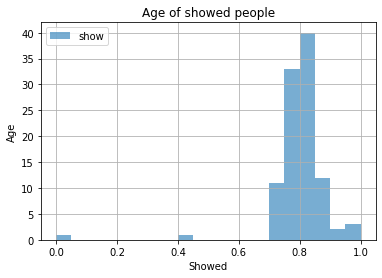

In [37]:
df_app.groupby('Age')['showed'].mean().hist(alpha=0.6,bins=20,label='show');
plt.xlabel("Showed")
plt.ylabel("Age")
plt.title("Age of showed people")
plt.legend()

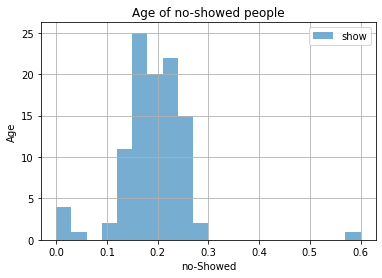

In [38]:
df_app.groupby('Age')['not_showed'].mean().hist(alpha=0.6,bins=20,label='show');
plt.xlabel("no-Showed")
plt.ylabel("Age")
plt.title("Age of no-showed people")
plt.legend()

Gender
37.08887421173107    0.000000
F                    0.796415
M                    0.799154
Name: showed, dtype: float64


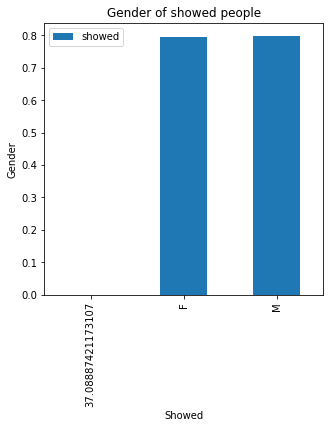

In [39]:
#Visualize show VS gender
print(df_app.groupby('Gender')['showed'].mean())
df_app.groupby('Gender')['showed'].mean().plot(kind='bar',figsize=(5,5));
plt.xlabel("Showed")
plt.ylabel("Gender")
plt.title("Gender of showed people")
plt.legend()

SMS_received
0.000000     0.832712
1.000000     0.723348
37.088874    0.000000
Name: showed, dtype: float64


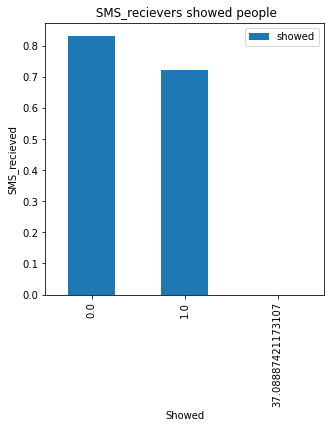

In [40]:
#Visualize show VS SMS recievers
print(df_app.groupby('SMS_received')['showed'].mean())
df_app.groupby('SMS_received')['showed'].mean().plot(kind='bar',figsize=(5,5));
plt.xlabel("Showed")
plt.ylabel("SMS_recieved")
plt.title(" SMS_recievers showed people")
plt.legend()

In [41]:
#Visualize show VS Alcoholism

Alcoholism
0.000000     0.797321
1.000000     0.798512
37.088874    0.000000
Name: showed, dtype: float64


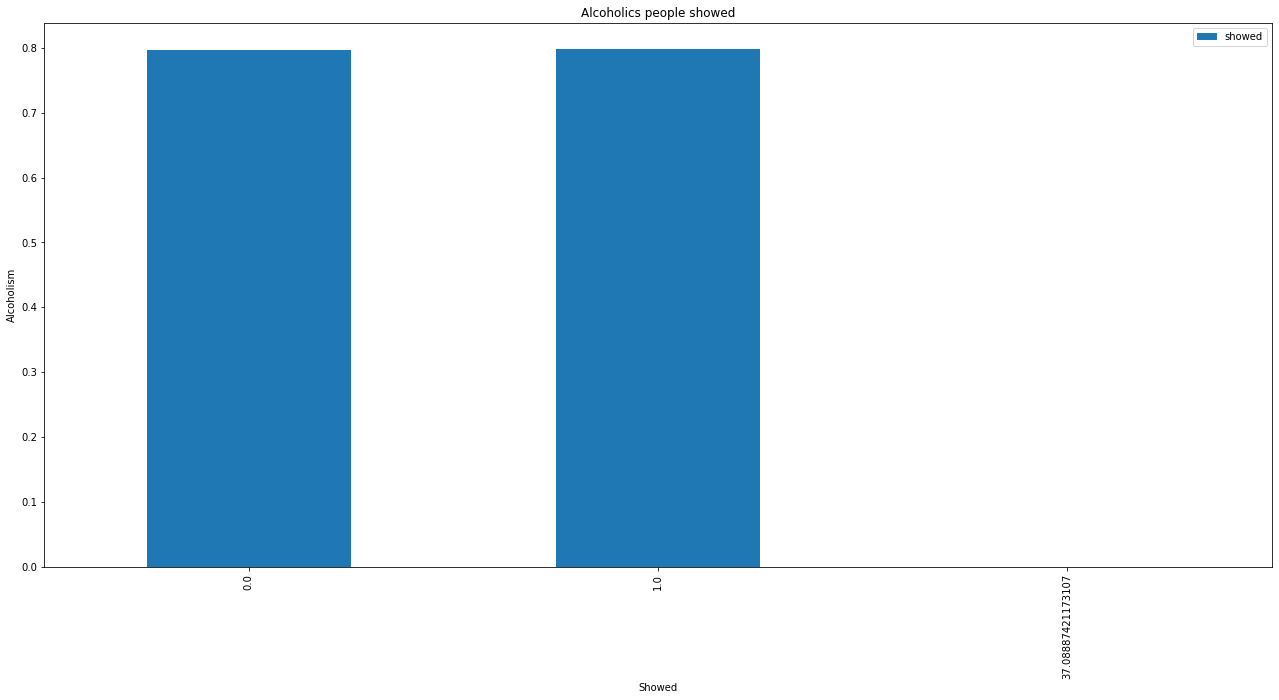

In [42]:
print(df_app.groupby('Alcoholism')['showed'].mean())
df_app.groupby('Alcoholism')['showed'].mean().plot(kind='bar',figsize=(22,10));
plt.xlabel("Showed")
plt.ylabel("Alcoholism")
plt.title("Alcoholics people showed")
plt.legend()

Hypertension
0.000000     0.789778
1.000000     0.826980
37.088874    0.000000
Name: showed, dtype: float64


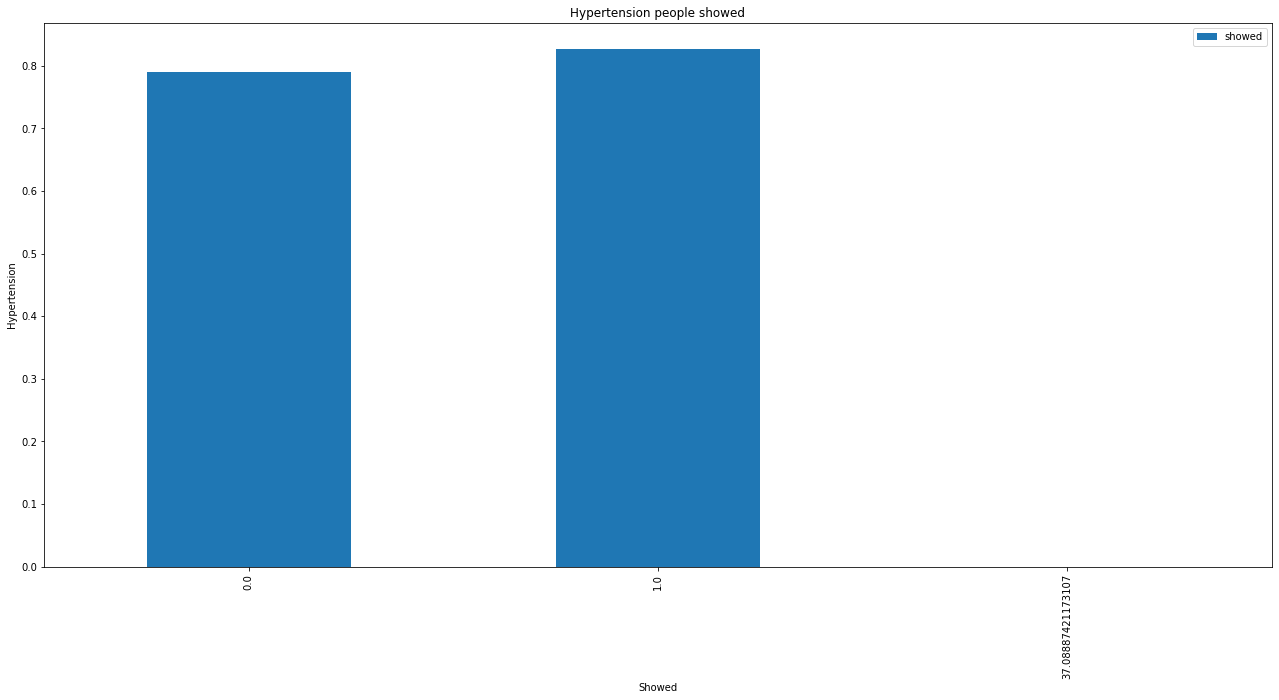

In [43]:
#Visualize show VS Hypertension
print(df_app.groupby('Hypertension')['showed'].mean())
df_app.groupby('Hypertension')['showed'].mean().plot(kind = 'bar',figsize=(22,10))
plt.xlabel("Showed")
plt.ylabel("Hypertension")
plt.title("Hypertension people showed")
plt.legend()

Handicap
0.000000     0.796911
1.000000     0.820676
2.000000     0.797814
3.000000     0.769231
4.000000     0.666667
37.088874    0.000000
Name: showed, dtype: float64


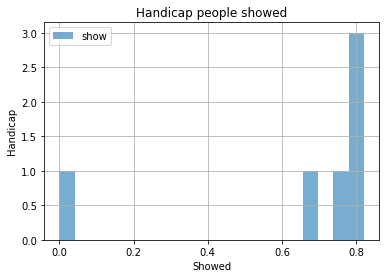

In [44]:
#Visualize show VS Handicap status
print(df_app.groupby('Handicap')['showed'].mean())
df_app.groupby('Handicap')['showed'].mean().hist(alpha=0.6,bins=20,label='show');
plt.xlabel("Showed")
plt.ylabel("Handicap")
plt.title("Handicap people showed")
plt.legend()

Diabetes
0.000000     0.795545
1.000000     0.819967
37.088874    0.000000
Name: showed, dtype: float64


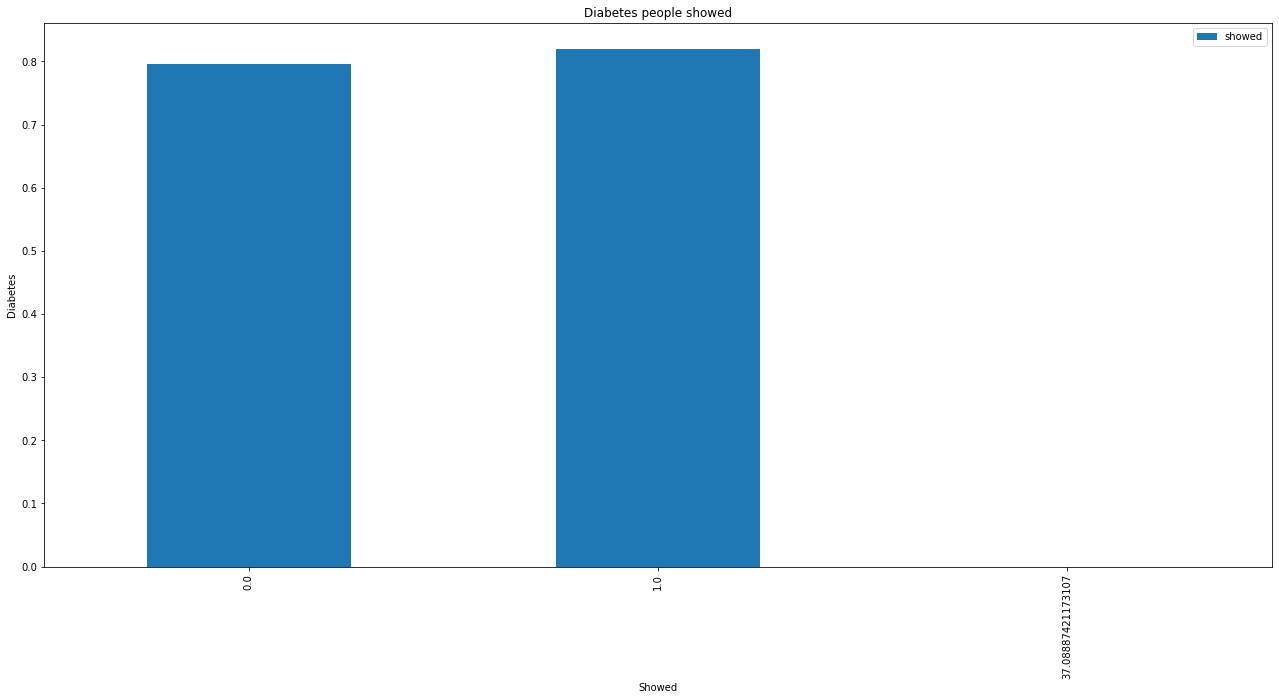

In [45]:
#Visualize show VS Diabetes
print(df_app.groupby('Diabetes')['showed'].mean())
df_app.groupby('Diabetes')['showed'].mean().plot(kind = 'bar',figsize=(22,10))
plt.xlabel("Showed")
plt.ylabel("Diabetes")
plt.title("Diabetes people showed")
plt.legend()

Scholarship
0.000000     0.801316
1.000000     0.762143
37.088874    0.000000
Name: showed, dtype: float64


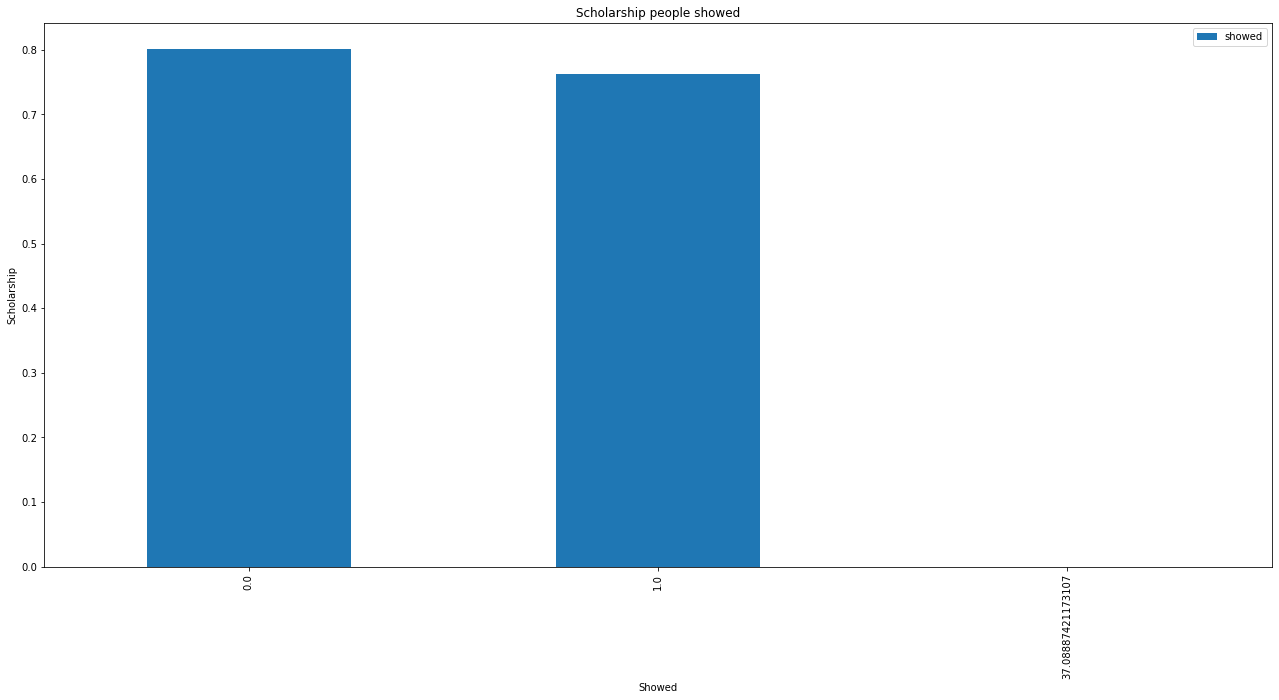

In [46]:
#Visualize show VS Scholarship
print(df_app.groupby('Scholarship')['showed'].mean())
df_app.groupby('Scholarship')['showed'].mean().plot(kind = 'bar',figsize=(22,10))
plt.xlabel("Showed")
plt.ylabel("Scholarship")
plt.title("Scholarship people showed")
plt.legend()

# Question 2  (population distribution for show and no show )

By about 77% the patient will come to his appointment


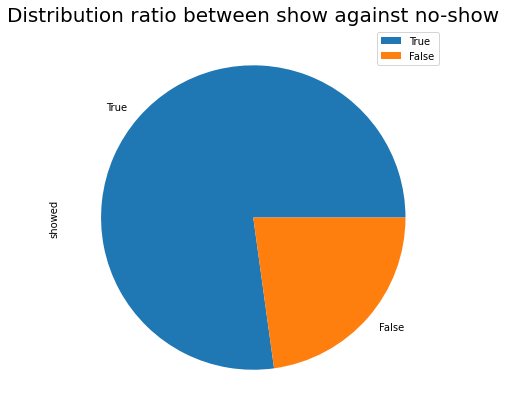

In [57]:
base = df_app['showed'].value_counts()
sh=round(base[1] / base.sum() * 100)
pieChart = base.plot.pie(figsize=(7,7), fontsize = 10);
pieChart.set_title('Distribution ratio between show against no-show', fontsize = 20);
plt.legend();
#print(sh)
print('By about '+str(sh)+'% the patient will come to his appointment')# independent on any other attaributes by ' + (base[1] / base.sum() * 100) ' any appointment the show')

<a id='conclusions'></a>
## Conclusions

#### Results:
- patients age is the most sufficient factor that affects show or no-show.
- patients who has hight level of Handicap ( 4 ) are more often to miss thier appointments comapring to others
- Attributes as  Gender , SMS, illness medical hidtory for disease as  (Alcoholism ,Hypertension,Diabetes) are not affecting show or no-show.
- Scholarship patience have higher chance miss appointments in comparison to patients who dosen't have Scholarship.

#### Limitations:
Note:
Regarding correlation  in  Exploration Phase  i tried to plot it but as per my understanding it will fit only for 
continous variables and in our case categorical variables hence the results is a little bit strange.

1.Most of our variables are categorical , which doesn't allow for high level of statistical method that can be used tp provide correlation

2-the statiscs used here are descreptive statiscs , not interfenial ,measning that we didn't create any hypotheses or controlled experiments or nterferences 

3-we don't lot's of details to draw conclusions , for the sms-recived example the data shows that no showers are more likely to recoeve an SMS

4-can't show strong correlation between factors since most of our data is categorical 